In [2]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from google.colab import drive

In [14]:
TRAINING_DIR = "/content/drive/MyDrive/Colab Notebooks/DataSet/FIRE-SMOKE-DATASET/Train"
training_datagen = ImageDataGenerator(rescale=1./255,
zoom_range=0.15,
horizontal_flip=True,
fill_mode='nearest')
VALIDATION_DIR = "/content/drive/MyDrive/Colab Notebooks/DataSet/FIRE-SMOKE-DATASET/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
TRAINING_DIR,
target_size=(224,224),
shuffle = True,
class_mode='categorical',
batch_size = 128)
validation_generator = validation_datagen.flow_from_directory(
VALIDATION_DIR,
target_size=(224,224),
class_mode='categorical',
shuffle = True,
batch_size= 14)

Found 2700 images belonging to 3 classes.
Found 300 images belonging to 3 classes.


In [15]:
input_tensor = Input(shape=(224, 224, 3))
base_model = InceptionV3(input_tensor=input_tensor, weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.25)(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.2)(x)
predictions = Dense(3, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
  layer.trainable = False
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 20,
validation_data = validation_generator,
validation_steps = 14)

Epoch 1/20
14/14 [==============================] - 275s 19s/step - loss: 9.0125 - acc: 0.5586 - val_loss: 0.4298 - val_acc: 0.8163
Epoch 2/20
14/14 [==============================] - 234s 17s/step - loss: 0.6342 - acc: 0.7550 - val_loss: 0.4571 - val_acc: 0.7959
Epoch 3/20
14/14 [==============================] - 217s 15s/step - loss: 0.5877 - acc: 0.7953 - val_loss: 0.3824 - val_acc: 0.8469
Epoch 4/20
14/14 [==============================] - 222s 16s/step - loss: 0.7078 - acc: 0.7930 - val_loss: 0.6996 - val_acc: 0.6735
Epoch 5/20
14/14 [==============================] - 216s 15s/step - loss: 0.4478 - acc: 0.8329 - val_loss: 0.4684 - val_acc: 0.8316
Epoch 6/20
14/14 [==============================] - 218s 15s/step - loss: 0.3274 - acc: 0.8675 - val_loss: 1.0742 - val_acc: 0.4694
Epoch 7/20
14/14 [==============================] - 219s 15s/step - loss: 0.6122 - acc: 0.8013 - val_loss: 0.8020 - val_acc: 0.6735
Epoch 8/20
14/14 [==============================] - 230s 16s/step - loss: 0.

In [16]:
for layer in model.layers[:249]:
  layer.trainable = False
for layer in model.layers[249:]:
  layer.trainable = True
#Recompile the model for these modifications to take effect
from tensorflow.keras.optimizers import SGD
model.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics=['acc'])
history = model.fit(
train_generator,
steps_per_epoch = 14,
epochs = 10,
validation_data = validation_generator,
validation_steps = 14)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/10
14/14 [==============================] - 283s 20s/step - loss: 0.6983 - acc: 0.6175 - val_loss: 0.3281 - val_acc: 0.8827
Epoch 2/10
14/14 [==============================] - 275s 21s/step - loss: 0.6427 - acc: 0.6605 - val_loss: 0.3654 - val_acc: 0.8673
Epoch 3/10
14/14 [==============================] - 291s 21s/step - loss: 0.5538 - acc: 0.7249 - val_loss: 0.3398 - val_acc: 0.8724
Epoch 4/10
14/14 [==============================] - 290s 21s/step - loss: 0.5088 - acc: 0.7818 - val_loss: 0.3575 - val_acc: 0.8827
Epoch 5/10
14/14 [==============================] - 278s 20s/step - loss: 0.4733 - acc: 0.8097 - val_loss: 0.3587 - val_acc: 0.8878
Epoch 6/10
14/14 [==============================] - 291s 21s/step - loss: 0.4168 - acc: 0.8449 - val_loss: 0.3644 - val_acc: 0.8827
Epoch 7/10
14/14 [==============================] - 272s 19s/step - loss: 0.4353 - acc: 0.8443 - val_loss: 0.3945 - val_acc: 0.8724
Epoch 8/10
14/14 [==============================] - 273s 19s/step - loss: 0.

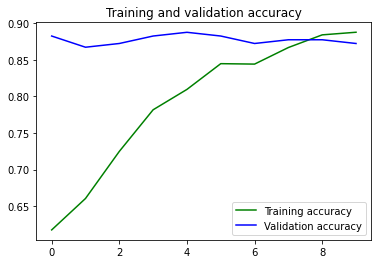

<Figure size 432x288 with 0 Axes>

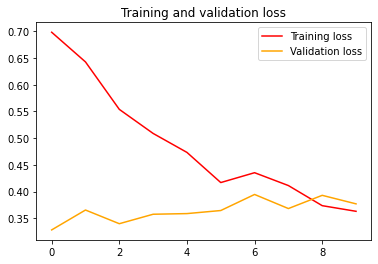

<Figure size 432x288 with 0 Axes>

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [23]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_7 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_564 (Conv2D)            (None, 111, 111, 32  864         ['input_7[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization_564 (Batch  (None, 111, 111, 32  96         ['conv2d_564[0][0]']             
 Normalization)                 )                                                           

In [25]:
model.layers

In [34]:
import tensorflow as tf
path = './model.h5'
model.save(path )
loaded_model= tf.keras.models.load_model(path )